In this Jupyter Notebook, I am going to create 2 Convolutional Neural Networks for the purposes of building a predictor for the MNIST handwritten digit data set. There are 60,000 photos of handwritten digits in the MNIST data set, and we will be using that data to learn our Convolutional Neural Networks.

For the first network, we are going to follow the following structure:
* A single conv2d layer
* One pooling layer
* One fully connected layer
* One softmax layer

The 2D convolutional layers are what processes the 2D MNIST input images. The first argument passed to Conv2D() is the number of output channels, which in our case is 32. The next is the kernel size, which in this example is a 5 by 5 moving window. Next, our activation function is specificed as "Rectified linear unit." Lastly, we are specifying the input shape as the input shape. ######EDIT THIS######

In [ ]:
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pylab as plt
import matplotlib.cm as cm

batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_x, img_y = 28, 28

# load the mnist data set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# reshape the data into a 4D tension - (sample numher, x_img_size, y_img_size, num_channles)
# because the MNIST is greyscale, we only have a single channel - RGB colour images would have 3
x_train = x_train.reshape(x_train.shape[0], img_x, img_y, 1)
x_test = x_test.reshape(x_test.shape[0], img_x, img_y, 1)
input_shape = (img_x, img_y, 1)

# convert the data to the right type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices - this is for use in the
# categorical_crossentropy loss below
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.1520 - acc: 0.9533 - val_loss: 0.0502 - val_acc: 0.9835
Epoch 2/10
60000/60000 [==============================] - 109s 2ms/step - loss: 0.0449 - acc: 0.9855 - val_loss: 0.0381 - val_acc: 0.9876
Epoch 3/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0275 - acc: 0.9911 - val_loss: 0.0344 - val_acc: 0.9885
Epoch 4/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0196 - acc: 0.9935 - val_loss: 0.0425 - val_acc: 0.9868
Epoch 5/10
60000/60000 [==============================] - 99s 2ms/step - loss: 0.0111 - acc: 0.9966 - val_loss: 0.0355 - val_acc: 0.9886
Epoch 6/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0098 - acc: 0.9968 - val_loss: 0.0371 - val_acc: 0.9892
Epoch 7/10
60000/60000 [============================

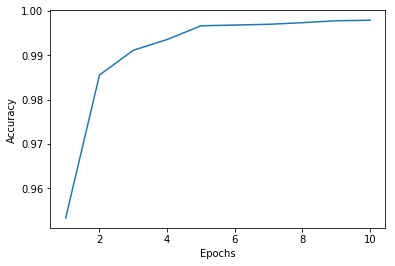

In [4]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                activation='relu',
                input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []
        
    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))
        
history = AccuracyHistory()

model.fit(x_train, y_train,
         batch_size=batch_size,
         epochs=epochs,
         verbose=1,
         validation_data=(x_test, y_test),
         callbacks=[history])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.plot(range(1, 11), history.acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Questions:

How many hidden layers are in your network?

How many convolutions are calculated in each convolution layer?

Run a single test example through the model and print some of the convolved images from the first layer. Can you see any feaatures from the image that are revealed by printing?

Print a couple of the convolution kernels as matrices (no need to print images). What kind of patterns can you see in the convolution kernels?

For the 2nd network, we are going to follow the following structure:

* 2 Convolutional layers
* One pooling layer
* One fully connected layer
* One softmax layer

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                activation='relu',
                input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model2.add(Conv2D(64, (5, 5), activation='relu'))
model2.add(Flatten())
model2.add(Dense(1000, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

Questions:

How many hidden layers are in your network?

How many convolutions are calculated in each convolution layer?

Run a single test example through the model and print some of the convolved images from the first layer. Can you see any feaatures from the image that are revealed by printing?

Print a couple of the convolution kernels as matrices (no need to print images). What kind of patterns can you see in the convolution kernels?